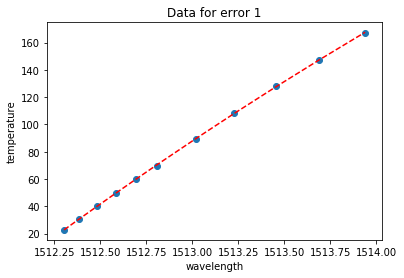

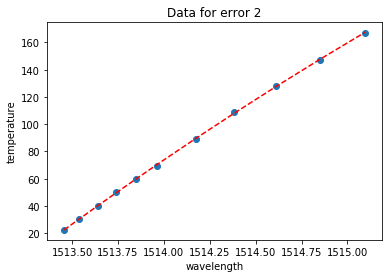

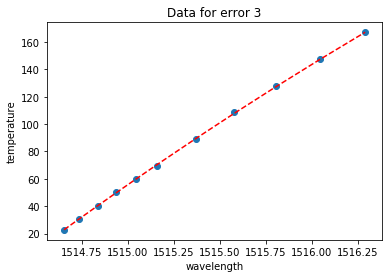

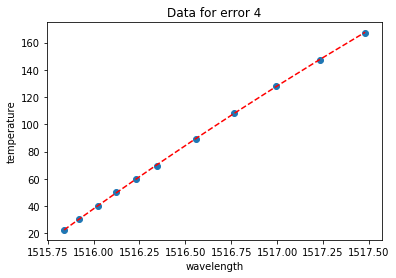

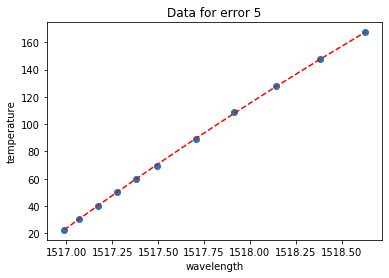

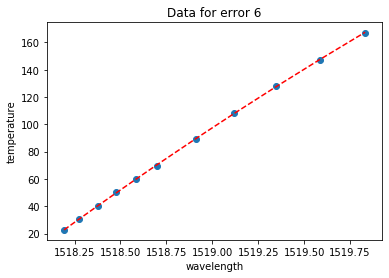

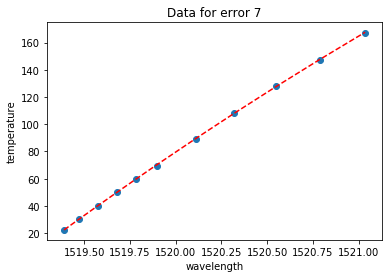

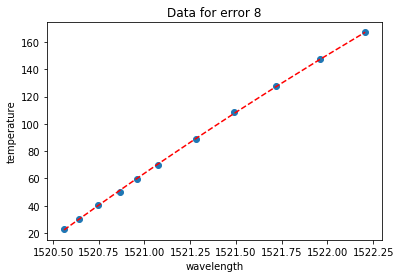

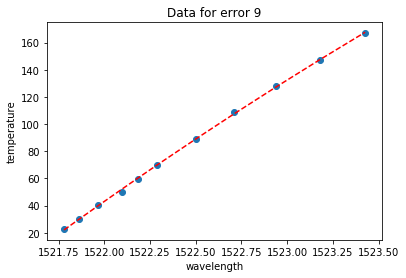

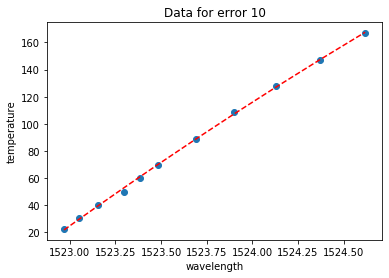

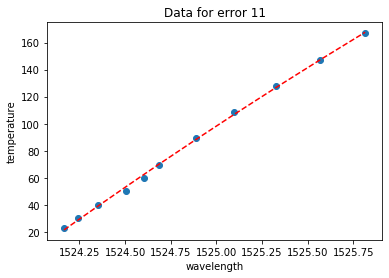

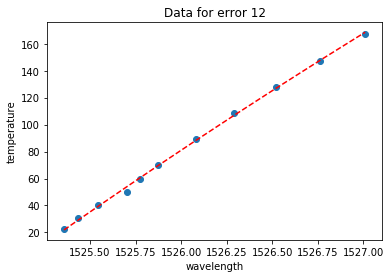

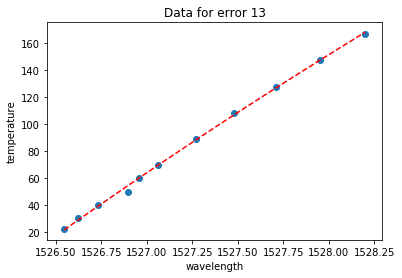

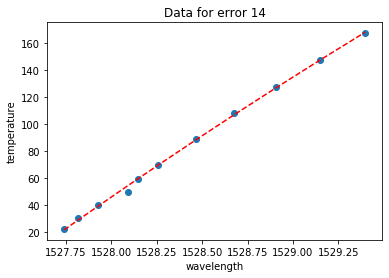

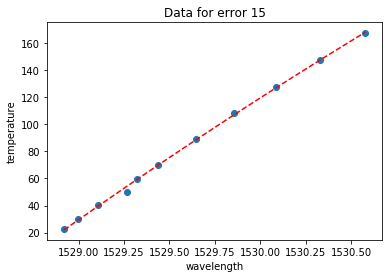

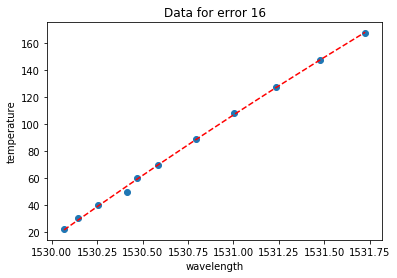

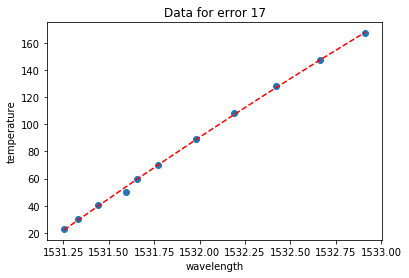

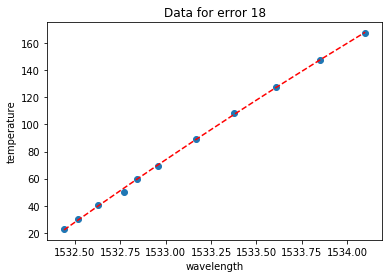

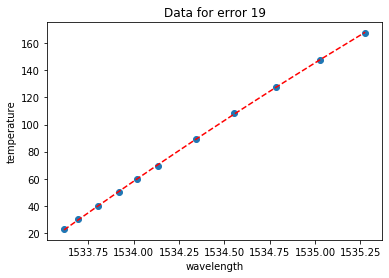

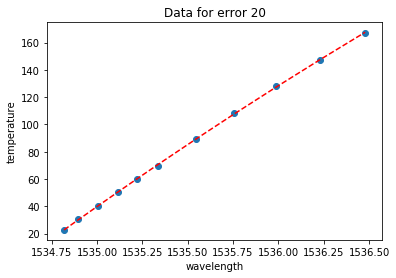

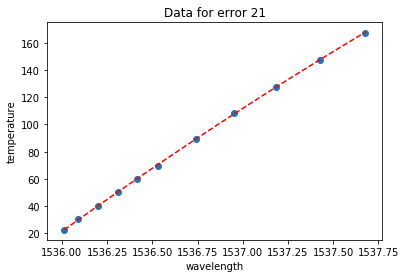

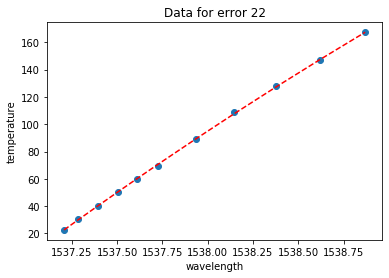

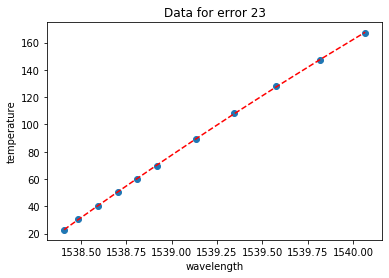

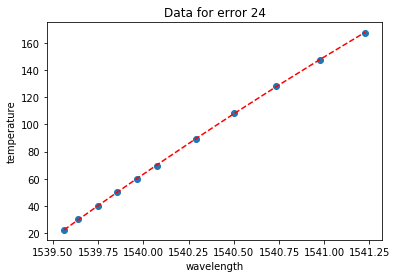

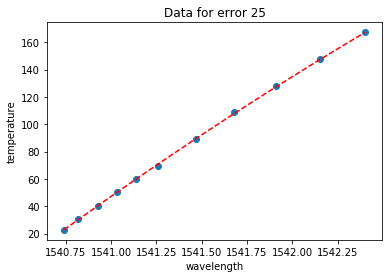

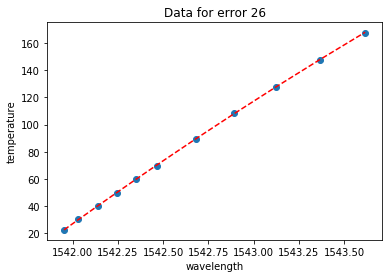

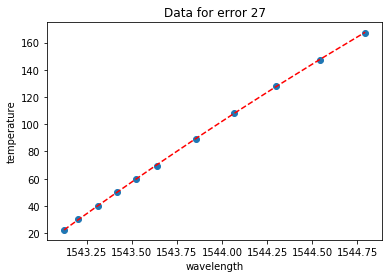

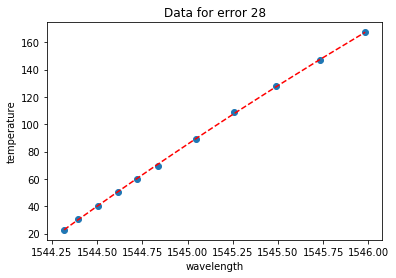

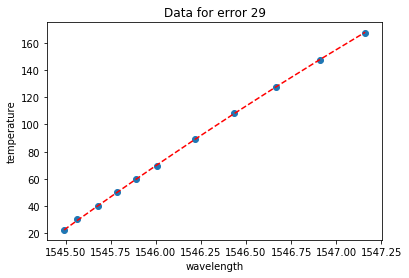

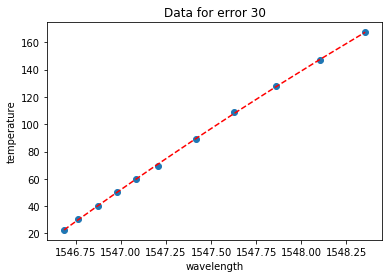

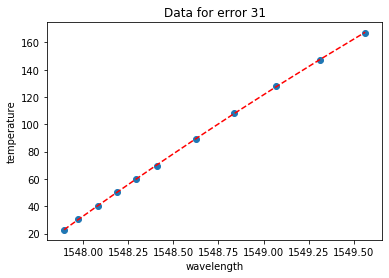

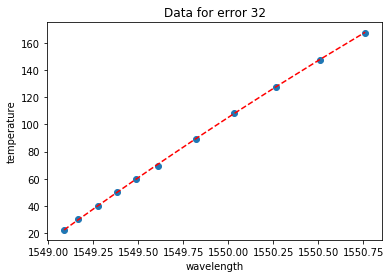

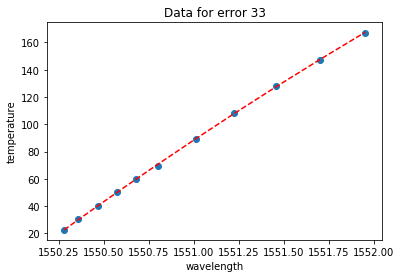

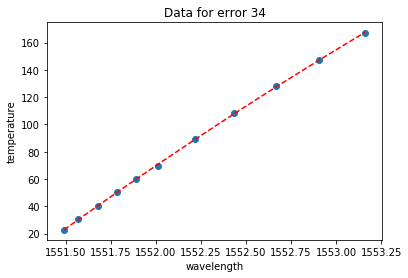

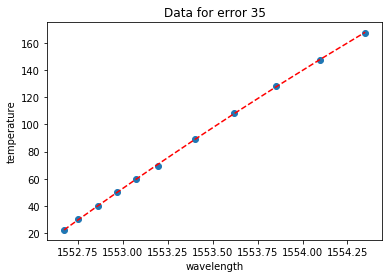

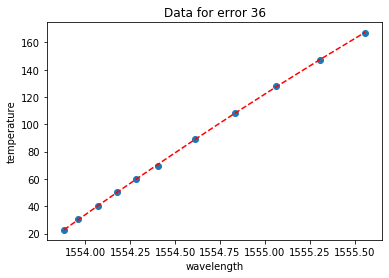

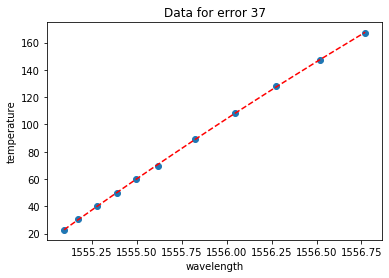

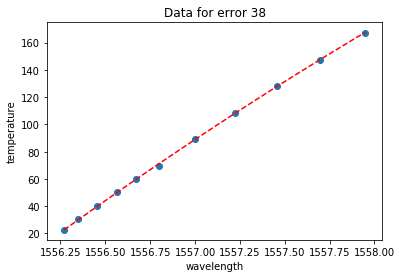

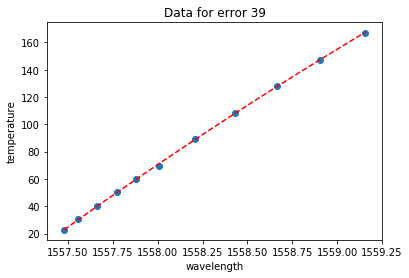

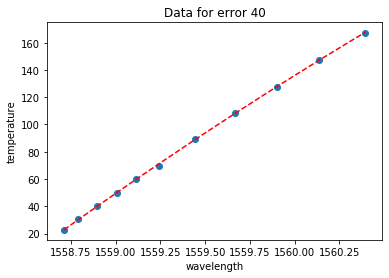

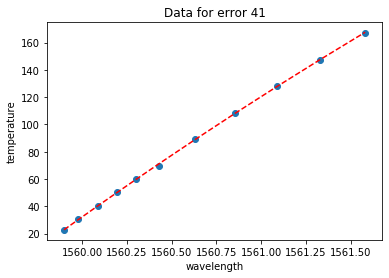

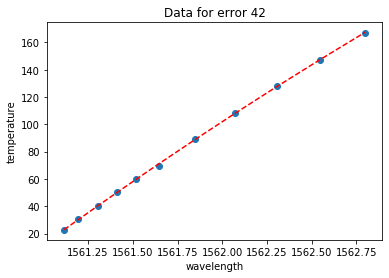

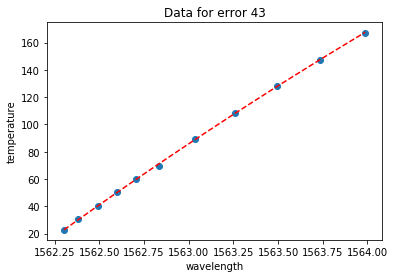

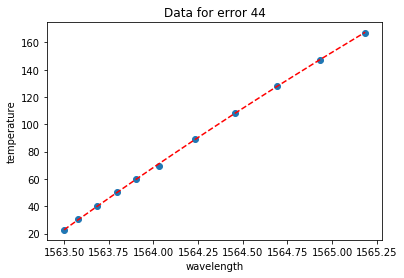

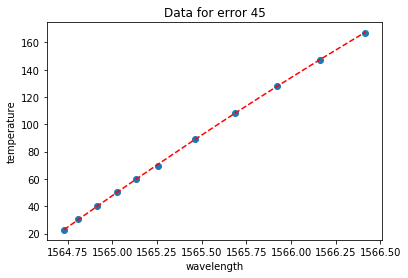

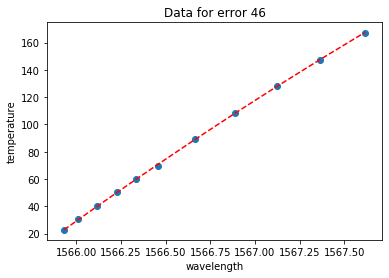

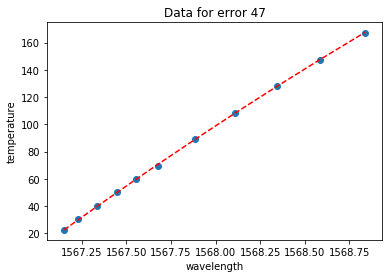

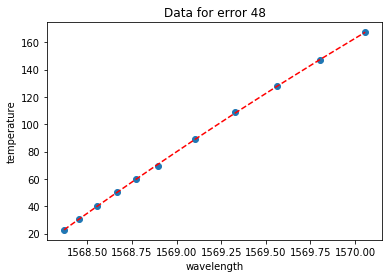

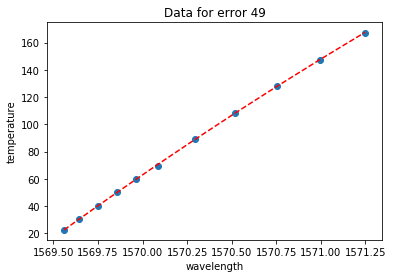

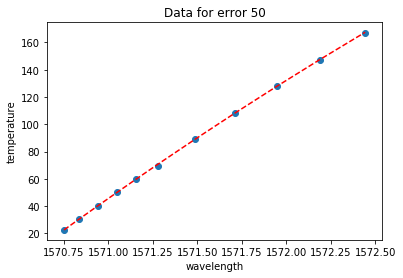

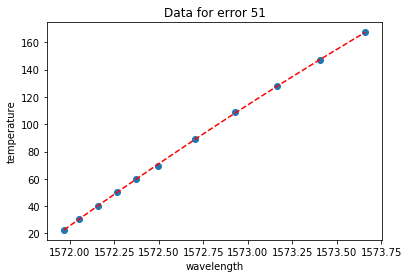

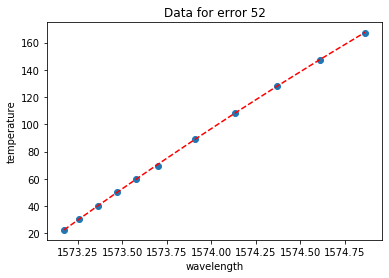

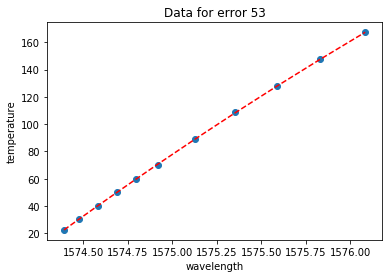

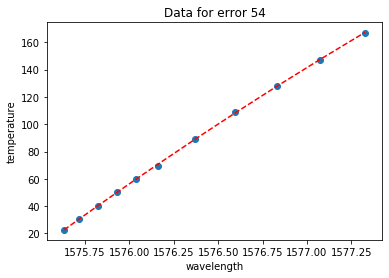

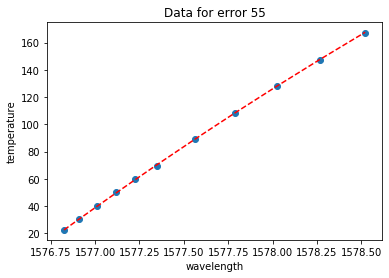

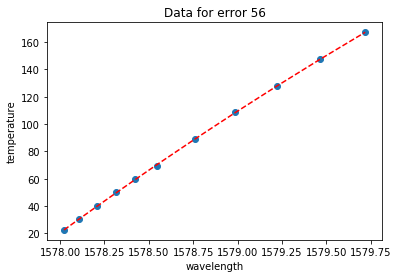

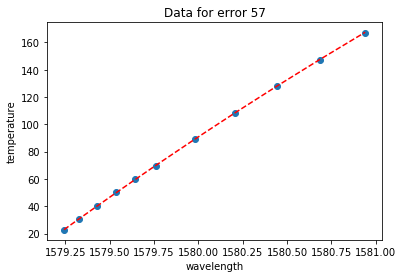

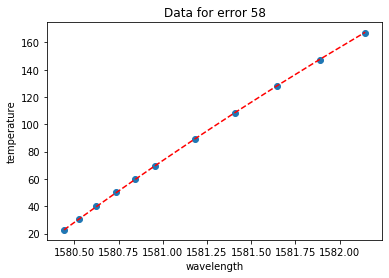

[[22.668834200128913,
  30.30771864578128,
  40.08473313972354,
  49.68785345181823,
  59.70590737462044,
  70.49730444513261,
  89.48933869041502,
  107.98095731623471,
  127.52625970169902,
  147.45027636364102,
  167.63748721405864],
 [22.38178838416934,
  30.118263265118003,
  40.001305321231484,
  49.67327672801912,
  59.78695867024362,
  70.5728437770158,
  89.62432835437357,
  108.07294730469584,
  127.66188851557672,
  147.5695784278214,
  167.5263728182763],
 [22.75992742739618,
  30.455261072143912,
  40.317295368760824,
  49.918348636478186,
  59.943435966968536,
  70.56617297232151,
  89.49115614779294,
  107.80855048447847,
  127.40661549009383,
  147.2759041134268,
  167.22312030941248],
 [22.479288145899773,
  30.206243086606264,
  40.11180092021823,
  49.70297932066023,
  59.74987262301147,
  70.414430167526,
  89.49366366118193,
  107.9378717970103,
  127.67837115563452,
  147.5978367049247,
  167.62440723367035],
 [22.492859026417136,
  30.15618823468685,
  40.2586225

In [24]:
import os
import pandas as pd
import numpy as np
import statistics as stat
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
import sklearn
import matplotlib.pyplot as plt
files = os.listdir("S0110")
files
coefficients = [-5.01766516413814, 15275.4542393188,-11625389.940747]
names = [22.5,30,40,50,60,70,90,110,130,150,170]
nums = [22.64388265, 30.39151613, 40.25746774, 50.07306452, 59.86404301, 69.66849462, 89.12866129, 108.618957, 127.8504355, 147.3812742, 167.2023226]
files_new = []
for t in names:
    files_new.append(str(t) + ".xls")
files_new
constant_list = []
finalData = []
def getData(number1,number2):
    avg1 = []
    avg2 = []
    avg_diff = []
    for f in files_new:
        data = pd.read_excel("S0110/" + f)
        list1 =(list(data.iloc[:,number1]))
        list2 = list(data.iloc[:,number2])
        avg1.append(list1[-1])
        avg2.append(list2[-1])
        avg_diff.append(list2[-1]-list1[-1]) 
    
    #plt.scatter(avg1,nums)
    #plt.plot(avg1,np.polyval(coefficients,avg1),'r--')
    #plt.show()
    constant = stat.mean(avg_diff)
    constant_list.append(constant)
    final_data = []
    xData = []
    adjusted_Data = []
    for o in avg2:
        b = o-constant
        z = np.polyfit(x=avg1,y=nums,deg=2)#gives me coefficients
        #p = np.poly1d(z)
        xData.append(b)
        p = np.poly1d(z)
        final_data.append( p(b))
    
    plt.scatter(xData,nums)
    plt.plot(xData,np.polyval(z,xData),'r--')
    plt.xlabel("wavelength")
    plt.ylabel("temperature")
    plt.title("Data for error " + str(number1))
    plt.savefig("Data/" + str(number1) + ".jpg")
    plt.show()
    return final_data
for gin in range(58):
    if gin != 59:
        finalData.append(getData(gin+1,gin+2))
    else :
        finalData.append((getData(60,1)))
len(finalData)
finalData

        

In [25]:
finalErrorData = []
maxList = []
for i in finalData:
    counter = 0
    listError = []
    max = i[0]-nums[0]
    for t in i:
        listError.append(t-nums[counter])
        if abs(t-nums[counter]) > max:
            max = t-nums[counter]
        counter+=1
    maxList.append(max)
    finalErrorData.append(listError)
finalErrorData

[[0.02495155012891459,
  -0.0837974842187208,
  -0.17273460027646337,
  -0.38521106818177486,
  -0.15813563537956554,
  0.828809825132609,
  0.36067740041502816,
  -0.6379996837652868,
  -0.32417579830098475,
  0.06900216364101652,
  0.4351646140586354],
 [-0.2620942658306582,
  -0.2732528648819965,
  -0.2561624187685183,
  -0.3997877919808843,
  -0.07708433975638229,
  0.9043491570158011,
  0.49566706437357766,
  -0.54600969530415,
  -0.188546984423283,
  0.18830422782139067,
  0.3240502182762839],
 [0.11604477739617991,
  0.06374494214391291,
  0.05982762876082148,
  -0.15471588352181698,
  0.07939295696853321,
  0.8976783523215062,
  0.3624948577929388,
  -0.810406515521521,
  -0.443820009906176,
  -0.10537008657320257,
  0.02079770941247716],
 [-0.1645945041002257,
  -0.1852730433937353,
  -0.14566681978177343,
  -0.37008519933976913,
  -0.11417038698853332,
  0.7459355475260026,
  0.36500237118193013,
  -0.6810852029896921,
  -0.1720643443654808,
  0.21656250492469553,
  0.4220846

In [26]:
maxList




[0.828809825132609,
 0.9043491570158011,
 0.8976783523215062,
 0.7459355475260026,
 0.8387477541221386,
 0.7624975679321295,
 0.7634759111208922,
 1.201062734262564,
 2.235605062009313,
 2.9548037247969887,
 3.5856241928651116,
 4.074910146208026,
 4.51515989846132,
 4.544717083708861,
 4.209816471697309,
 4.187994708330848,
 3.664782864065387,
 2.9127881685509465,
 0.8212348990510918,
 0.35401767719497457,
 0.6666924827169396,
 0.9270762720955616,
 0.3484381981562592,
 0.4990302328388907,
 0.9141611935449845,
 0.5294137321781136,
 0.8735503548635251,
 0.15311031643261686,
 0.5574280530582882,
 0.9456954909367568,
 0.9061285456521517,
 0.8984689352912909,
 1.0805383784575469,
 1.0846674194438464,
 1.1547342439992434,
 1.2795371351642615,
 1.224207637260676,
 1.3170210936917073,
 1.345563824648977,
 1.3384841656191355,
 1.359465399186135,
 1.3494117664052254,
 1.3449727104855782,
 1.2762210754556662,
 1.2305413031829602,
 1.1863955570263869,
 1.167909720341683,
 1.2239588176710612,
 1.1